# Introduction

In [ ]:
"""
What? LDA and shrinkage regularsation

This example illustrates how the Ledoit-Wolf and Oracle Shrinkage Approximating (OAS) estimators 
of covariance can improve classification.

Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_lda.html#sphx-glr-auto-examples-classification-plot-lda-py
"""

# Import modules

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import OAS
from matplotlib import rcParams
import sklearn
sklearn.__version__

'0.23.2'

In [2]:
n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

In [6]:
def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

In [30]:
acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr',
                                          shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr',
                                          shrinkage=None).fit(X, y)
        oa = OAS(store_precision=False, assume_centered=False)        

        clf3 = LinearDiscriminantAnalysis(solver='lsqr').fit(X,y)
                                          #covariance_estimator=oa).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

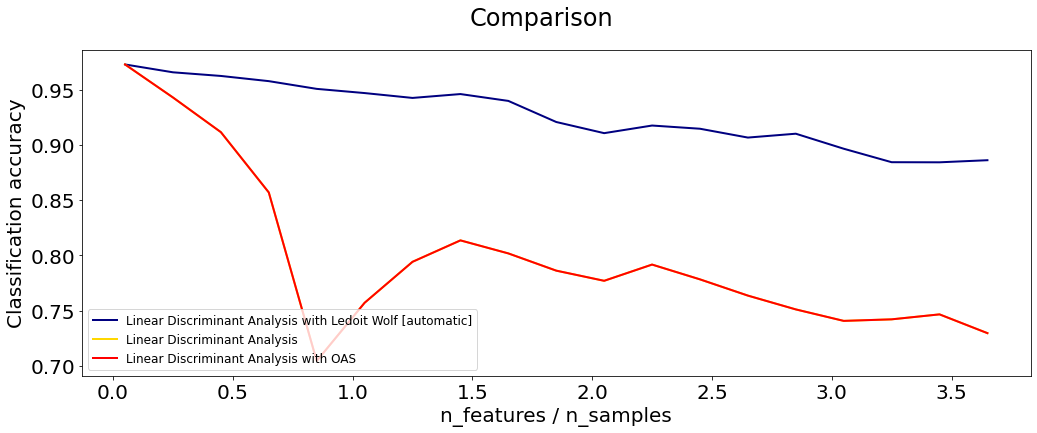

In [31]:
features_samples_ratio = np.array(n_features_range) / n_train

rcParams['font.size'] = 20
rcParams['figure.figsize'] = 17, 6
plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with Ledoit Wolf [automatic]", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')
plt.plot(features_samples_ratio, acc_clf3, linewidth=2,
         label="Linear Discriminant Analysis with OAS", color='red')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=3, prop={'size': 12})
plt.suptitle('Comparison')
plt.show()